# Momala Malaria dataset

### The following script analyses data from Momala

# Imports

In [1]:
from matplotlib import pyplot as plt
from collections import Counter
from random import sample
from pprint import pprint
from os.path import join
from os import listdir
import pandas as pd
import os
import json
import cv2
import csv

# How many images?

In [2]:
folder_1 = join('momala','momala_data_selection_uva.zip', 'AMREF17')
folder_2 = join('momala','momala_data_selection_uva.zip', 'MR4')

files_in_1 = listdir(folder_1)
files_in_2 = listdir(folder_2)

print('Number of images')
print('In AMREF17: {}'.format(len(files_in_1)))
print('In MR4: {}'.format(len(files_in_2)))
print('In total: {}'.format(len(files_in_1) + len(files_in_2)))

Number of images
In AMREF17: 356
In MR4: 5199
In total: 5555


# How many annotations?

In [3]:
json_path = join('momala','dataFiles', 'docs_extract_v1.0.json')

with open(json_path) as json_file:
     data = json.load(json_file)

image_grouping_names = list()
for group in data:
    image_grouping_names.append(group)
    
number_of_annotation = 0
for group in image_grouping_names:
    fields = data[group][0]['fields']
    
    for field in fields: 
        labels = field['labels']
        # Image doesn't contain annotations.
        if not labels:
            continue
        # Image does contain annotations.
        else: 
            number_of_annotation += len(labels)
print('There are {} annotations.'.format(number_of_annotation))

There are 3260 annotations.


# Lets only keep images with annotations

In [4]:
urls = list()
image_detections = dict()

for group in image_grouping_names:
    fields = data[group][0]['fields']
    
    for field in fields: 
        labels = field['labels']
        if not labels:
            continue
            
        else: 
            url = field['url']
            if url not in image_detections:
                image_detections[url] = list()
            
            for detection in labels:
                category = detection['type']
                coordinates = detection['coordinates']
                x_min = int(coordinates['left'])
                y_min = int(coordinates['top'])
                x_max = int(coordinates['right'])
                y_max = int(coordinates['bottom'])
                
                entry = (x_min, y_min, x_max, y_max, category)
                image_detections[url].append(entry)
                
print(image_detections)

{'MR4/HFAPER_pfrpaLBgz7Tqu5ayz_92.jpg': [(1354, 1049, 1369, 1064, 'white_blood_cell'), (428, 2180, 443, 2195, 'white_blood_cell'), (831, 2256, 846, 2271, 'white_blood_cell'), (926, 2859, 941, 2874, 'white_blood_cell'), (1545, 2814, 1560, 2829, 'white_blood_cell'), (1912, 2477, 1927, 2492, 'white_blood_cell'), (2525, 1853, 2540, 1868, 'white_blood_cell'), (1821, 2914, 1836, 2929, 'white_blood_cell'), (1479, 3146, 1494, 3161, 'white_blood_cell')], 'MR4/HFAPER_pfrpaLBgz7Tqu5ayz_91.jpg': [(1806, 1199, 1821, 1214, 'white_blood_cell'), (1912, 1375, 1927, 1390, 'white_blood_cell'), (826, 1999, 841, 2014, 'white_blood_cell'), (629, 2859, 644, 2874, 'white_blood_cell'), (871, 3005, 886, 3020, 'white_blood_cell'), (1515, 2814, 1530, 2829, 'white_blood_cell'), (1952, 2517, 1967, 2532, 'white_blood_cell'), (1635, 2965, 1650, 2980, 'white_blood_cell'), (2138, 2945, 2153, 2960, 'white_blood_cell')], 'MR4/HFAPER_pfrpaLBgz7Tqu5ayz_100.jpg': [(1555, 2228, 1570, 2243, 'white_blood_cell'), (2425, 2499, 2

# Show the first 3 images

In [5]:
# Make the plots bigger, to clearly see image
plt.rcParams["figure.figsize"] = (12,9)

# A helper function, to change BGR color 
# encoding that cv2 uses, to the RGB color 
# encoding matplotlib uses.
def convert_color(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

momala/momala_data_selection_uva.zip/MR4/HFAPER_pfrpaLBgz7Tqu5ayz_92.jpg


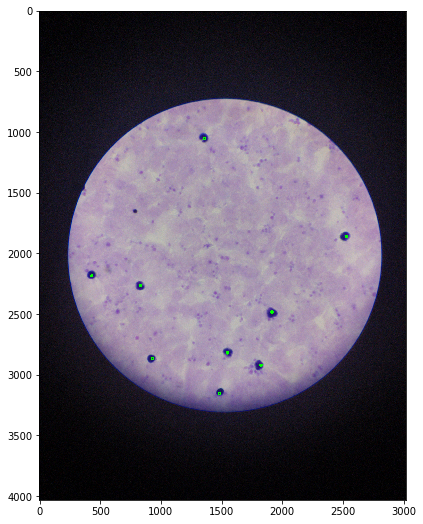

momala/momala_data_selection_uva.zip/MR4/HFAPER_pfrpaLBgz7Tqu5ayz_91.jpg


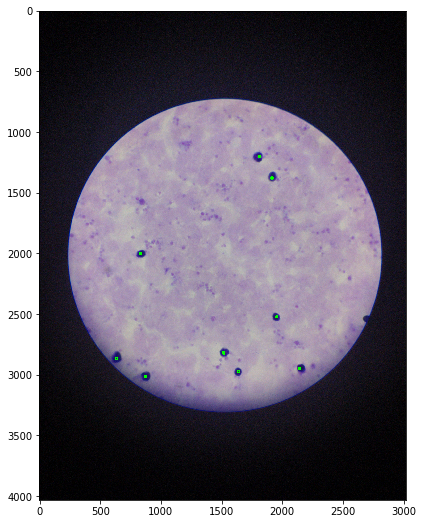

momala/momala_data_selection_uva.zip/MR4/HFAPER_pfrpaLBgz7Tqu5ayz_100.jpg


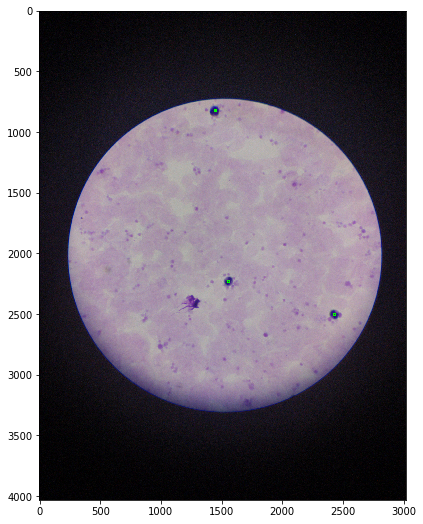

In [6]:
for idx, image_url in enumerate(image_detections): 
    
    # Break after 10 images
    if idx >= 3:
        break
         
    # Make it windows compatible
    directory, file_name = image_url.split('/')
    image_path = join('momala','momala_data_selection_uva.zip', directory, file_name)
    print(image_path)
    image = cv2.imread(image_path)
    image = convert_color(image)
    red   = (0, 0, 255)
    green = (0, 255, 0)
    thickness = 10
    color = green
    
    for detection in image_detections[image_url]:
        (x_min, y_min, x_max, y_max, category) = detection  
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
        
    plt.imshow(image)
    plt.show()

# What else, aside from white blood cells? 

In [7]:
categories = set()
for image_url in image_detections:
    for detection in image_detections[image_url]:
        category = detection[4]
        categories.add(category)

print('The categories present are :', categories)

The categories present are : {'debris', 'malariae', 'white_blood_cell', 'falciparum', 'ovale'}


The categories refer to:
- Plasmodium malariae
- Plasmodium falciparum
- Plasmodium ovale

# How many images with plasmodium?

In [8]:
images_with_plasmodium_count = 0 
images_with_plasmodium = list()

plasmodium_types = ['malariae', 'falciparum', 'ovale']

for image_url in image_detections:
    for detection in image_detections[image_url]:
        category = detection[4]
        if category in plasmodium_types:
            images_with_plasmodium_count += 1
            images_with_plasmodium.append(image_url)
            break 
            
print('There are {} images with plasmodium'.format(images_with_plasmodium_count))
print(images_with_plasmodium)

There are 34 images with plasmodium
['AMREF17/fissF6hWExddYxSYg_0.jpg', 'AMREF17/fissF6hWExddYxSYg_1.jpg', 'AMREF17/fissF6hWExddYxSYg_2.jpg', 'AMREF17/fissF6hWExddYxSYg_3.jpg', 'AMREF17/fissF6hWExddYxSYg_4.jpg', 'AMREF17/fissF6hWExddYxSYg_5.jpg', 'AMREF17/fissF6hWExddYxSYg_6.jpg', 'AMREF17/fissF6hWExddYxSYg_7.jpg', 'AMREF17/fissF6hWExddYxSYg_8.jpg', 'AMREF17/fissF6hWExddYxSYg_9.jpg', 'AMREF17/dTLcJ5iLyZJesx964_0.jpg', 'AMREF17/R8X47Hj9g5YN4EDKk_1.jpg', 'AMREF17/R8X47Hj9g5YN4EDKk_3.jpg', 'AMREF17/R8X47Hj9g5YN4EDKk_5.jpg', 'AMREF17/R8X47Hj9g5YN4EDKk_6.jpg', 'AMREF17/R8X47Hj9g5YN4EDKk_9.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_0.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_1.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_2.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_3.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_4.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_5.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_6.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_7.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_8.jpg', 'AMREF17/jAb7gPK7TQnPLjPbL_9.jpg', 'AMREF17/Aem3TozrCoiaPvSKY_1.jpg', 'AMREF17/Aem3TozrC

# How many plasmodium?

In [9]:
plasmodium_counter = Counter()

for image_url in image_detections:
    for detection in image_detections[image_url]:
        category = detection[4]
        plasmodium_counter[category] += 1
        
print(plasmodium_counter)

total_plasmodium = 0 
for plasmodium_type in plasmodium_types:
    total_plasmodium += plasmodium_counter[plasmodium_type]

print('\nWhich is a total of {} plasmodium'.format(total_plasmodium))

Counter({'falciparum': 2192, 'white_blood_cell': 825, 'debris': 106, 'malariae': 73, 'ovale': 64})

Which is a total of 2329 plasmodium


# Show 3 plasmodium images

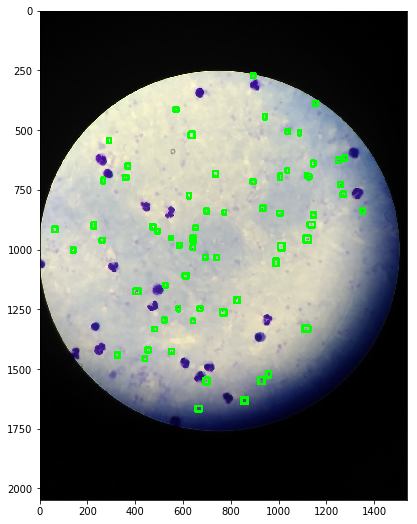

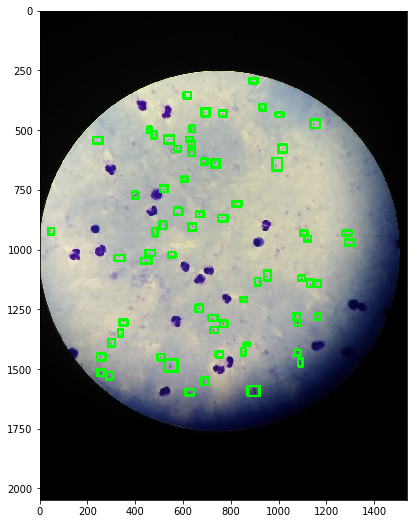

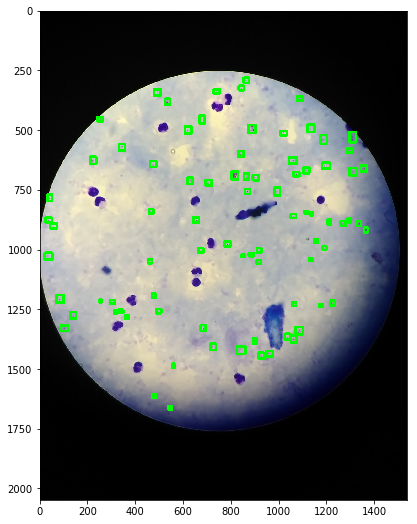

In [10]:
nr_to_show = 3

for image_url in images_with_plasmodium[:nr_to_show]:
    directory, file_name = image_url.split('/')
    image_path = join('momala','momala_data_selection_uva.zip', directory, file_name)
    image = cv2.imread(image_path)
    image = convert_color(image)
    for detection in image_detections[image_url]:
        (x_min, y_min, x_max, y_max, category) = detection
        if category not in ['white_blood_cell', 'debris']:        
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
    plt.imshow(image)
    plt.show()

# What's in the green box? 

First row:  malariae
Second row:  falciparum
Third row:  ovale


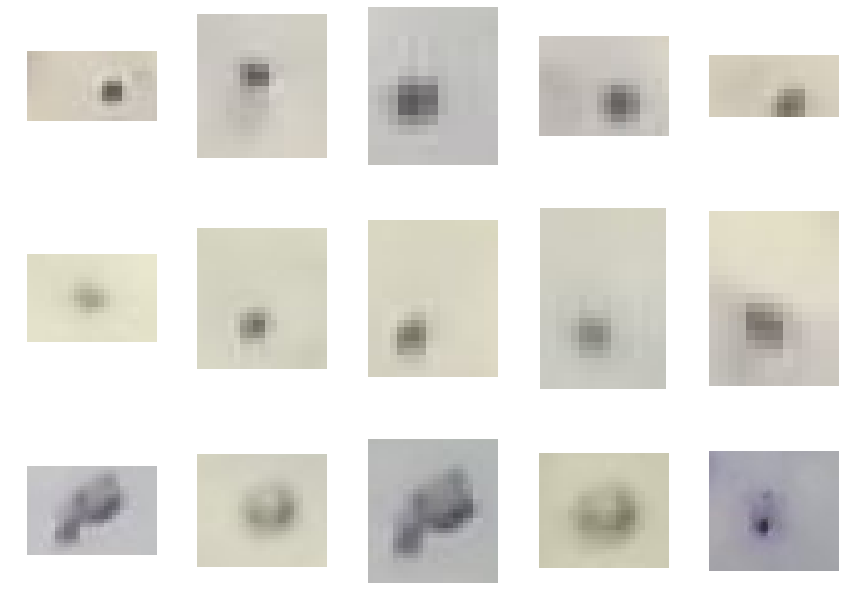

In [11]:
extracted_images = dict()

for plasmo in plasmodium_types:
    extracted_images[plasmo] = list()

for image_url in images_with_plasmodium:
    directory, file_name = image_url.split('/')
    image_path = join('momala','momala_data_selection_uva.zip', directory, file_name)
    image = cv2.imread(image_path)
    image = convert_color(image)
    for detection in image_detections[image_url]:
        (x_min, y_min, x_max, y_max, category) = detection
        if category in plasmodium_types:
            extracted = image[y_min:y_max,x_min:x_max] # Extract the bounding box
            extracted_images[category].append(extracted)
            
fig, axis_array = plt.subplots(3, 5) 
fig.tight_layout()

print('First row: ',  plasmodium_types[0])
print('Second row: ', plasmodium_types[1])
print('Third row: ',  plasmodium_types[2])

for row_index, plasmodium_type in enumerate(plasmodium_types):
    for column_index in range(5):

        image_index = column_index
        image_to_plot = extracted_images[plasmodium_type][image_index]
        axis_array[row_index, column_index].set_axis_off()
        axis_array[row_index, column_index].imshow(image_to_plot)

# Save all plasmodium subimages and create csv with labels

In [12]:
image_directory = 'plasmodium_subimages'
if not os.path.exists(image_directory):
    os.makedirs(image_directory)
    
train_labels_df = pd.DataFrame(columns=['image','class'])
    
for plasmodium_type in plasmodium_types:
    for idx, image in enumerate(extracted_images[plasmodium_type]):
        image = convert_color(image)
        image_name = '{}_{}.png'.format(plasmodium_type,idx)
        image_path = join(image_directory, image_name)
        cv2.imwrite(image_path, image)
        class_number = plasmodium_types.index(plasmodium_type)
        train_labels_df.loc[idx] = [image_name,class_number]
        
print(train_labels_df)        
train_labels_df.to_csv('train_labels.csv')

                    image class
0             ovale_0.png     2
1             ovale_1.png     2
2             ovale_2.png     2
3             ovale_3.png     2
4             ovale_4.png     2
5             ovale_5.png     2
6             ovale_6.png     2
7             ovale_7.png     2
8             ovale_8.png     2
9             ovale_9.png     2
10           ovale_10.png     2
11           ovale_11.png     2
12           ovale_12.png     2
13           ovale_13.png     2
14           ovale_14.png     2
15           ovale_15.png     2
16           ovale_16.png     2
17           ovale_17.png     2
18           ovale_18.png     2
19           ovale_19.png     2
20           ovale_20.png     2
21           ovale_21.png     2
22           ovale_22.png     2
23           ovale_23.png     2
24           ovale_24.png     2
25           ovale_25.png     2
26           ovale_26.png     2
27           ovale_27.png     2
28           ovale_28.png     2
29           ovale_29.png     2
...     

# Load images

In [23]:
import tensorflow as tf
# tf.reset_default_graph()

from keras.preprocessing.image import ImageDataGenerator

shift=0.2

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1, 
            rotation_range=360,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest')

train_generator = datagen.flow_from_dataframe(dataframe=train_labels_df, directory='./Desktop/plasmodium_subimages', x_col="image", y_col="class", has_ext=True, shuffle=True, class_mode="categorical", target_size=(80,80), subset='training', batch_size=50, color_mode='grayscale')
  
valid_generator = datagen.flow_from_dataframe(dataframe=train_labels_df, directory='/plasmodium_subimages', x_col="image", y_col="class", has_ext=True, shuffle=True, subset='validation', target_size=(80,80), class_mode="categorical", batch_size=50, color_mode='grayscale')
    


AttributeError: 'ImageDataGenerator' object has no attribute 'flow_from_dataframe'